In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

data_file_path = os.getcwd()
nine_path = "C:/Users/govertsen.k/Northeastern University/Community Resilience in Extreme Temperatures - Data/Vulnerability Mapping"

def C_to_F(C):
    F = C*9/5 + 32
    return F


In [7]:
# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

extension = 'csv'
os.chdir(data_file_path)
result = glob.glob('*.{}'.format(extension))

nineoneone = pd.read_csv(nine_path + '/911.csv',low_memory=False)
nineoneone['ACTUAL_DTE']= pd.to_datetime(nineoneone['ACTUAL_DTE'])

weather = pd.read_csv(data_file_path + '/USW00094746.csv',low_memory=False)
weather['DATE'] = pd.to_datetime(weather['DATE'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\devel\\myphddissertation\\Untitled Folder/USW00094746.csv'

In [5]:
nineoneone['DATE']=pd.to_datetime(nineoneone['ACTUAL_DTE']).dt.date.astype('datetime64[ns]')

NameError: name 'nineoneone' is not defined

In [36]:
# reduce weather 
weather = weather.loc[(weather['DATE'] >= nineoneone['DATE'][0]) & (weather['DATE'] <= nineoneone['DATE'].iloc[-1]) ]
weather = weather.reset_index(drop=True)


In [37]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2015-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2015-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2015-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2015-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2015-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2022-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2559,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2022-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2022-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2561,USW00094746,"WORCESTER, MA US",42.27054,-71.87312,305.5,2022-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
weather['CALLS']=0
for each_day in weather['DATE']:
    weather.loc[weather['DATE']==each_day,'CALLS'] = len(nineoneone.loc[nineoneone['DATE'] == each_day])

<BarContainer object of 2563 artists>

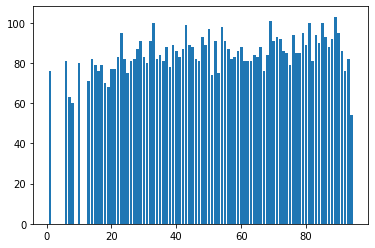

In [46]:
plt.bar(weather['TMAX'],weather['CALLS'])

<AxesSubplot:title={'center':'CALLS'}, xlabel='TMAX'>

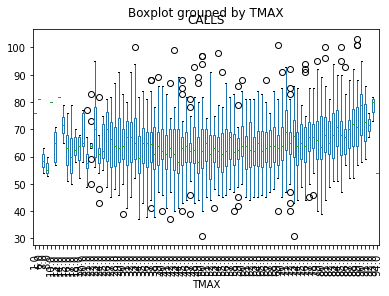

In [47]:
weather.boxplot(by='TMAX',column='CALLS',grid=False,rot=90)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

# Convert temperature values from Celsius to Fahrenheit
weather['TMAXF'] = C_to_F(weather['TMAX'])

# Calculate quartiles
q1 = np.percentile(weather['CALLS'], 25)
q3 = np.percentile(weather['CALLS'], 75)

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot weather calls on primary y-axis
ax1.plot(weather['TMAXF'], weather['CALLS'], marker='o', color='b')
ax1.set_xlabel('Weather Temperature (°F)', color='b')
ax1.set_ylabel('Weather Calls', color='b')
ax1.tick_params('y', colors='b')

# Plot upper and lower quartiles as horizontal lines
ax1.hlines([q1, q3], min(weather_temperature_F), max(weather_temperature_F), linestyles='dashed', colors='r', label='Quartiles')

# Fill the area between the quartiles
ax1.fill_between(weather['TMAXF'], q1, q3, alpha=0.3, color='r', label='Quartile Range')

# Create a second y-axis for temperature in Celsius
ax2 = ax1.twinx()
# ax2.plot(weather['TMAXF'], weather['TMAX'], marker='o', color='g')
# ax2.set_ylabel('Weather Temperature (°C)', color='g')
# ax2.tick_params('y', colors='g')

# Set plot title
plt.title('Weather Calls and Temperature vs. Weather Temperature')

# Show the legend
ax1.legend(loc='upper left')

# Show the plot
plt.show()


NameError: name 'weather' is not defined

In [48]:
import math
by = 3
xticks = np.arange(min(weather['TMAX']),math.ceil(max(weather['TMAX'])/by)*by+by,by)
weather['GROUP']=0
for each_tick in xticks:
    weather.loc[(weather['TMAX']>=each_tick)&(weather['TMAX']<each_tick+by),'GROUP'] = each_tick

<AxesSubplot:title={'center':'CALLS'}, xlabel='GROUP'>

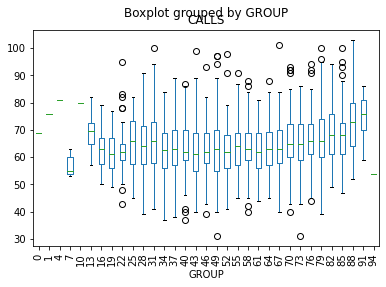

In [49]:
weather.boxplot(by='GROUP',column='CALLS',grid=False,rot=90)